Importation des données

Possibilité drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_folder=r'/content/drive/My Drive/Fish_Dataset'

In [ ]:
from google.colab import files

Importation directe depuis kaggle: 
https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [14]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp /kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
! kaggle datasets download crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [01:04<00:00, 53.3MB/s]
100% 3.24G/3.24G [01:04<00:00, 53.6MB/s]


In [21]:
! unzip /content/a-large-scale-fish-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00448.png  
  inflating:

In [22]:
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [23]:
image_dir=Path('/content/Fish_Dataset/Fish_Dataset')

In [24]:
filepaths=list(image_dir.glob(r'**/*.png'))
filepaths

[PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00030.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00162.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00011.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00801.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00829.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00795.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00331.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00426.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00062.png'),
 PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00323.png'),
 PosixPath('/content

Tests

In [25]:
filepaths[0]

PosixPath('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet/00030.png')

In [26]:
os.path.split(os.path.split(filepaths[0])[0])[1]

'Striped Red Mullet'

In [27]:
labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped Red Mullet',
 'Striped R

In [28]:
filepaths=pd.Series(filepaths,name='filepath').astype(str)
labels=pd.Series(labels,name='label')
images = pd.concat((filepaths,labels),axis=1)
images

,filepath,label
0,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
1,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
2,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
3,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
4,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
...,...,...
17995,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17996,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17997,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17998,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp


In [29]:
#remove GT data
images['label']=images['label'].apply(lambda x:np.NaN if x[-2:]=='GT' else x)

In [30]:
len(images[images['label'].isna()])

9000

In [31]:
images=images.dropna()
images

,filepath,label
0,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
1,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
2,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
3,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
4,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
...,...,...
17995,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17996,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17997,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp
17998,/content/Fish_Dataset/Fish_Dataset/Shrimp/Shri...,Shrimp


In [32]:
images['label'].value_counts()

Striped Red Mullet    1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Black Sea Sprat       1000
Red Sea Bream         1000
Trout                 1000
Sea Bass              1000
Red Mullet            1000
Shrimp                1000
Name: label, dtype: int64

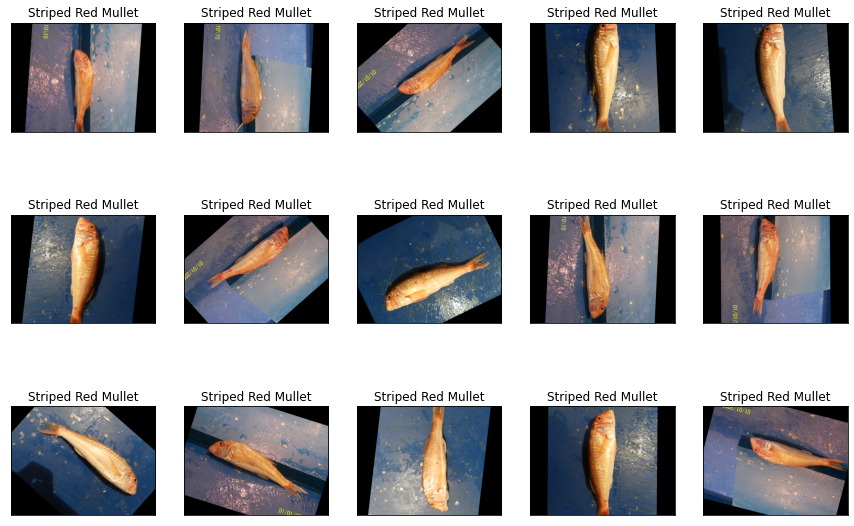

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(images.filepath[i]))
    ax.set_title(images.label[i])
    
plt.show()

In [34]:
x_train, x_test = train_test_split(images, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [35]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (5040, 2)
Shape of test data (2700, 2)
Shape of validation data (1260, 2)


Entrainement

In [36]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [37]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='filepath', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='filepath', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='filepath', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


In [38]:
train.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [39]:
list(train.class_indices.keys())[list(train.class_indices.values()).index(0)]

'Black Sea Sprat'

In [40]:
input_shape = (200, 200, 3)

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [42]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=20, callbacks=callback)

Epoch 1/20
158/158 [==============================] - 123s 697ms/step - loss: 1.9507 - accuracy: 0.2097 - val_loss: 1.5491 - val_accuracy: 0.3508
Epoch 2/20
158/158 [==============================] - 103s 655ms/step - loss: 1.6042 - accuracy: 0.3171 - val_loss: 1.5243 - val_accuracy: 0.3357
Epoch 3/20
158/158 [==============================] - 103s 653ms/step - loss: 1.4952 - accuracy: 0.3563 - val_loss: 1.3877 - val_accuracy: 0.4032
Epoch 4/20
158/158 [==============================] - 104s 657ms/step - loss: 1.4238 - accuracy: 0.3933 - val_loss: 1.2942 - val_accuracy: 0.4175
Epoch 5/20
158/158 [==============================] - 103s 654ms/step - loss: 1.3386 - accuracy: 0.4480 - val_loss: 1.1337 - val_accuracy: 0.5302
Epoch 6/20
158/158 [==============================] - 104s 660ms/step - loss: 1.1301 - accuracy: 0.5224 - val_loss: 0.9352 - val_accuracy: 0.5587
Epoch 7/20
158/158 [==============================] - 104s 659ms/step - loss: 0.9920 - accuracy: 0.5700 - val_loss: 0.9218 -

Minimum Validation Loss: 0.2309
Minimum Accuracy Loss: 0.3357


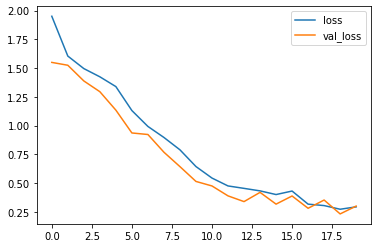

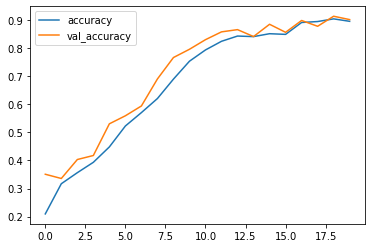

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print("Minimum Accuracy Loss: {:0.4f}".format(history_df['val_accuracy'].min()))

Observating features

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

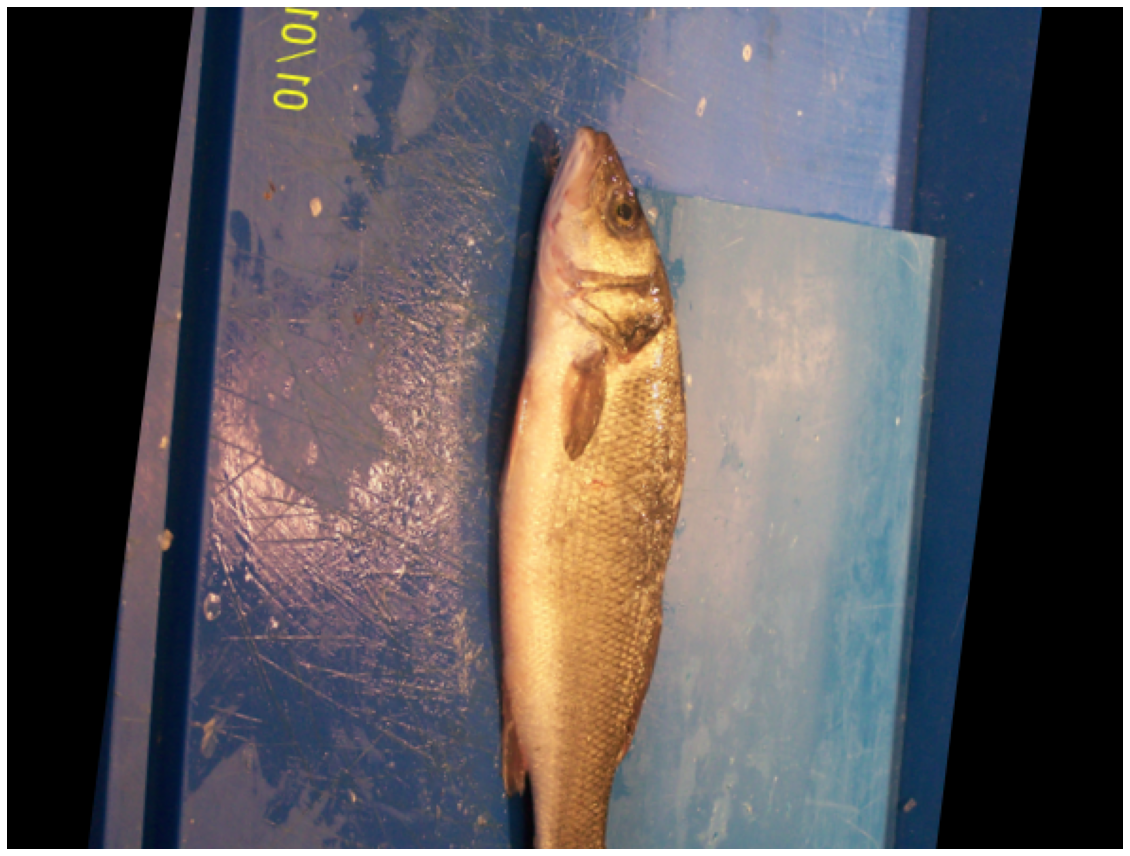

-----------------------------------------------------
1st convolutionnal layer
conv2d | Features Shape: (1, 198, 198, 64)
Dimension 64
--------
1st Pooling
max_pooling2d | Features Shape: (1, 99, 99, 64)
Dimension 64
-----------------------------------------------------
-----------------------------------------------------
4nd convolutionnal layer
conv2d_3 | Features Shape: (1, 21, 21, 32)
Dimension 32
--------
4nd Pooling
max_pooling2d_3 | Features Shape: (1, 10, 10, 32)
Dimension 32
-----------------------------------------------------


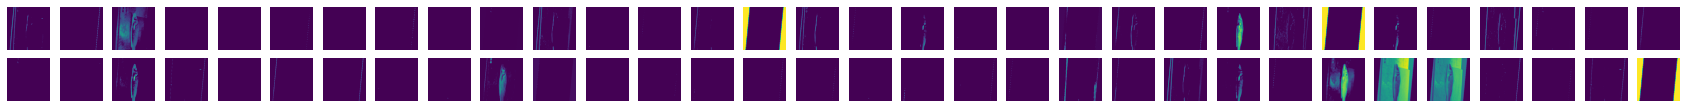

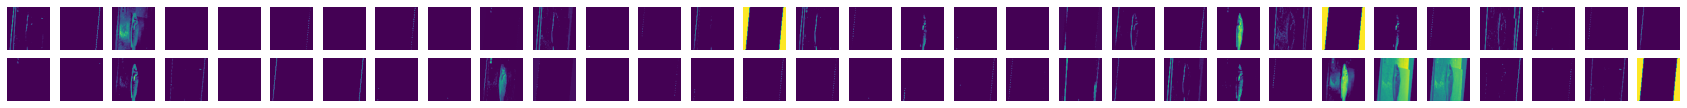

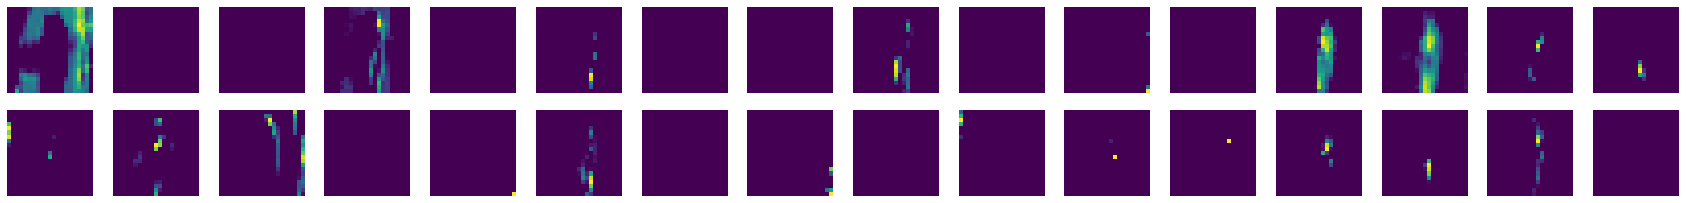

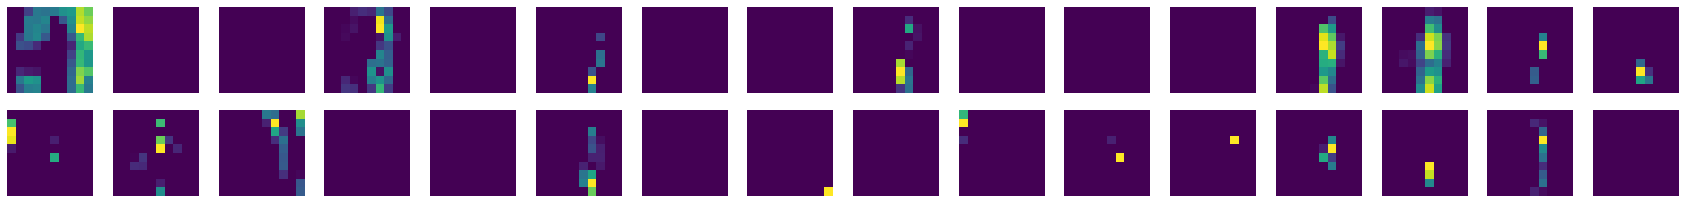

In [72]:
import cv2
from numpy import asarray
from PIL import Image

def display_image_filtered(name_image,model,layer_name,image):
    inp= model.inputs 
    out1= model.get_layer(layer_name).output  
    feature_map_1= Model(inputs= inp, outputs= out1)  
    img=cv2.resize(image,(200,200))              
    input_img= np.expand_dims(img, axis=0)      
    f=feature_map_1.predict(input_img) 
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')
    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results_{name_image}'):
        os.makedirs(f'results_{name_image}')        
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])

num = 0
for name in list(train.class_indices.keys()):
    if name == 'Sea Bass':
        image_path = images[images['label']=='Sea Bass'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
        for i in range(0,4):
          if num == 0 and i==0:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d',image)
            print('--------')
            print(f'{i+1}st Pooling')
            display_image_filtered(name,model,f'max_pooling2d',image)
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}nd convolutionnal layer')
            display_image_filtered(name,model,f'conv2d_{num+i}',image)
            print('--------')
            print(f'{i+1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d_{num+i}',image)
            print('-----------------------------------------------------')
    """
    elif name == 'Gilt-Head Bream':
        image_path = images[images['label']=='Gilt-Head Bream'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Hourse Mackerel':
        image_path = images[images['label']=='Hourse Mackerel'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Red Mullet':
        image_path = images[images['label']=='Red Mullet'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Red Sea Bream':
        image_path = images[images['label']=='Red Sea Bream'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Sea Bass':
        image_path = images[images['label']=='Sea Bass'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Shrimp':
        image_path = images[images['label']=='Shrimp'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Striped Red Mullet':
        image_path = images[images['label']=='Striped Red Mullet'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    elif name == 'Trout':
        image_path = images[images['label']=='Trout'].filepath.iloc[0]
        img = Image.open(image_path)
        image = asarray(img)
        plt.axis('off')
        plt.imshow(plt.imread(image_path))
        plt.show()
    """

In [69]:
ls /content/results_Black\ Sea\ Sprat 

'Black Sea Sprat_conv2d_0.jpg'     'Black Sea Sprat_max_pooling2d_0.jpg'
'Black Sea Sprat_conv2d_1_0.jpg'   'Black Sea Sprat_max_pooling2d_1_0.jpg'
'Black Sea Sprat_conv2d_10.jpg'    'Black Sea Sprat_max_pooling2d_10.jpg'
'Black Sea Sprat_conv2d_1_10.jpg'  'Black Sea Sprat_max_pooling2d_1_10.jpg'
'Black Sea Sprat_conv2d_1_11.jpg'  'Black Sea Sprat_max_pooling2d_1_11.jpg'
'Black Sea Sprat_conv2d_1_12.jpg'  'Black Sea Sprat_max_pooling2d_1_12.jpg'
'Black Sea Sprat_conv2d_1_13.jpg'  'Black Sea Sprat_max_pooling2d_1_13.jpg'
'Black Sea Sprat_conv2d_1_14.jpg'  'Black Sea Sprat_max_pooling2d_1_14.jpg'
'Black Sea Sprat_conv2d_1_15.jpg'  'Black Sea Sprat_max_pooling2d_1_15.jpg'
'Black Sea Sprat_conv2d_1_16.jpg'  'Black Sea Sprat_max_pooling2d_1_16.jpg'
'Black Sea Sprat_conv2d_1_17.jpg'  'Black Sea Sprat_max_pooling2d_1_17.jpg'
'Black Sea Sprat_conv2d_1_18.jpg'  'Black Sea Sprat_max_pooling2d_1_18.jpg'
'Black Sea Sprat_conv2d_1_19.jpg'  'Black Sea Sprat_max_pooling2d_1_19.jpg'
'Black Sea Sprat_c

In [57]:
list(train.class_indices.keys())

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

Test data

In [58]:
len(test)

85

In [59]:
res = model.predict(test)

In [60]:
classes_res=np.argmax(res,axis=1)

In [61]:
x_test = x_test.reset_index(drop=True)

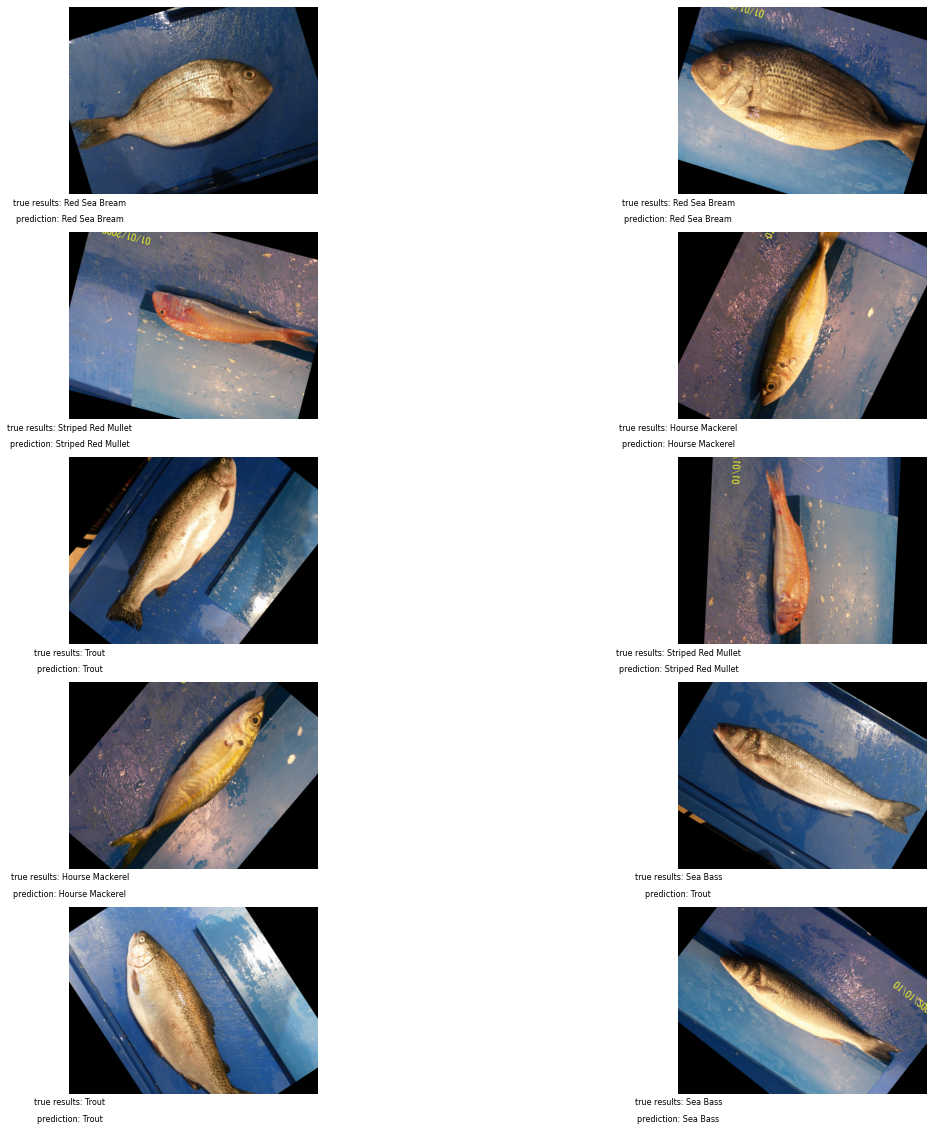

In [62]:
plt.rcParams['figure.figsize'] = (20,20) 
for i in range(0, len(classes_res)):
  if i < 10:
    ax=plt.subplot(5,2,i+1)
    ax.imshow(plt.imread(x_test.filepath[i]))
    ax.axis('off')
    ax.invert_yaxis()
    ax.text(x=0, y=-50, fontsize=8, ha='center', va='top', s='prediction: ' + list(train.class_indices.keys())[list(train.class_indices.values()).index(classes_res[i])])
    ax.text(x=0, y=-10, fontsize=8, ha='center', va='top', s='true results: ' + x_test.label.iloc[i])
plt.show()  